# Note
https://dining-developer.tistory.com/26
위 링크에 fastai를 통한 이미지 처리 전반에 대해 설명이 잘 되어 있습니다. 관심 있으시다면 한 번 읽어보셔도 좋을 것 같아요.

In [3]:
from fastai.vision import *
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
from pathlib import Path
from PIL import UnidentifiedImageError

import warnings
warnings.filterwarnings('ignore')

In [4]:
from fastai.vision.learner import cnn_learner

# 데이터 전처리

In [3]:
### 오픈할 수 없는 이미지 삭제
### 이미 오픈할 수 없는 이미지는 모두 삭제했으므로 코드를 주석처리 해둔다. 

'''
# 파일 경로 설정. 나중에 구글드라이브 경로로 바꿔줘야 한다. 
wd = "/Users/choikyoungwan/eclipse-workspace/AI_Biz_Strategy/FinalProject/archive/sneaker_dataset/images/train/"

#Path.rglob ~ 경로 내 파일들의 리스트를 입맛대로 가져온다. 즉, jpg를 확장자로 가지는 이미지만 불러온다! 
path = Path(wd).rglob("*.jpg")
for c in path:
    try:
        #jpg를 확장자로 가지는 친구들을 한 번씩 열어본다. 열어만 보고 뭘 더 하진 않는다. 
        img = PIL.Image.open(c)
    except PIL.UnidentifiedImageError:
        #안열리면 바로 삭제 
        os.remove(c)
        print(c + " is removed")
'''

# 데이터 확인


In [3]:
wd = "/Users/choikyoungwan/eclipse-workspace/AI_Biz_Strategy/FinalProject/archive/sneaker_dataset/images/"
path = Path(wd)

In [4]:
np.random.seed(42)

#fastai.vision의 ImageDataBunch를 사용하기 위해선 train과 test 파일 경로를 구분해서 설정해야 한다.
#지금은 우리가 폴더별로 운동화를 정리해서 여기서 테스트셋을 정리하는 것은 어려울 것 같고, 우선은 데이터 전체를 트레인셋으로 넣어 본다. 
data = ImageDataBunch.from_folder(path, train = '.', valid_pct = 0.2, 
                                 ds_tfms = get_transforms(do_flip = False), size = 224, bs= 64, num_workers = 4).normalize(imagenet_stats)

# ImageDataBunch가 값을 불러오는 과정에서 예전 버전의 pytorch~ 를 사용하고 있다. 
# 일단 데이터 불러오는데 문제는 없어 봐준다. 해결할 능력도 없고...
# 빨간줄이 너무 많이 떠서 warnings 함수를 통해 경고 무시..!

In [5]:
#데이터를 잘 불러오는지 확인
data.classes

['Air Force 1 Type',
 'Air Force 1 Type Black',
 'Air Huarache Black Black White',
 'Air Huarache Drift South Beach',
 'Air Huarache White Platinum',
 'Air Jordan 1 Mid Yellow Toe Black',
 'Air Max 1 112 Pack',
 'Air Max 1 AMS Parra Amsterdam',
 'Air Max 1 Animal Pack',
 'Air Max 1 Anniversary Obsidian',
 'Air Max 1 Anniversary Red (2017)',
 'Air Max 1 Anniversary Royal (2017)',
 'Jordan 1 Retro High Spider-Man Origin Story',
 'Jordan 1 Retro High Sports Illustrated (A Star Is Born)',
 'Jordan 1 Retro High Track Red',
 'Jordan 1 Retro High Travis Scott',
 'Jordan 1 Retro High Turbo Green',
 'Jordan 1 Retro High Twist (W)',
 'Jordan 4 Retro Black Laser',
 'Jordan 4 Retro Bred (2019)',
 'Jordan 4 Retro Columbia (2015)',
 'Jordan 4 Retro Cool Grey (2004)',
 'Jordan 4 Retro Cool Grey (2019)',
 'Jordan 4 Retro Doernbecher',
 'Jordan 4 Retro Eminem Carhartt',
 'Jordan 4 Retro Flight Nostalgia',
 'Jordan 4 Retro Flyknit Red',
 'Jordan 4 Retro Hot Punch (W)',
 'Jordan 4 Retro Kaws',
 'Jordan 4

/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/tor

/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/tor

/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/Users/choikyoungwan/opt/anaconda3/lib/python3.8/site-packages/tor

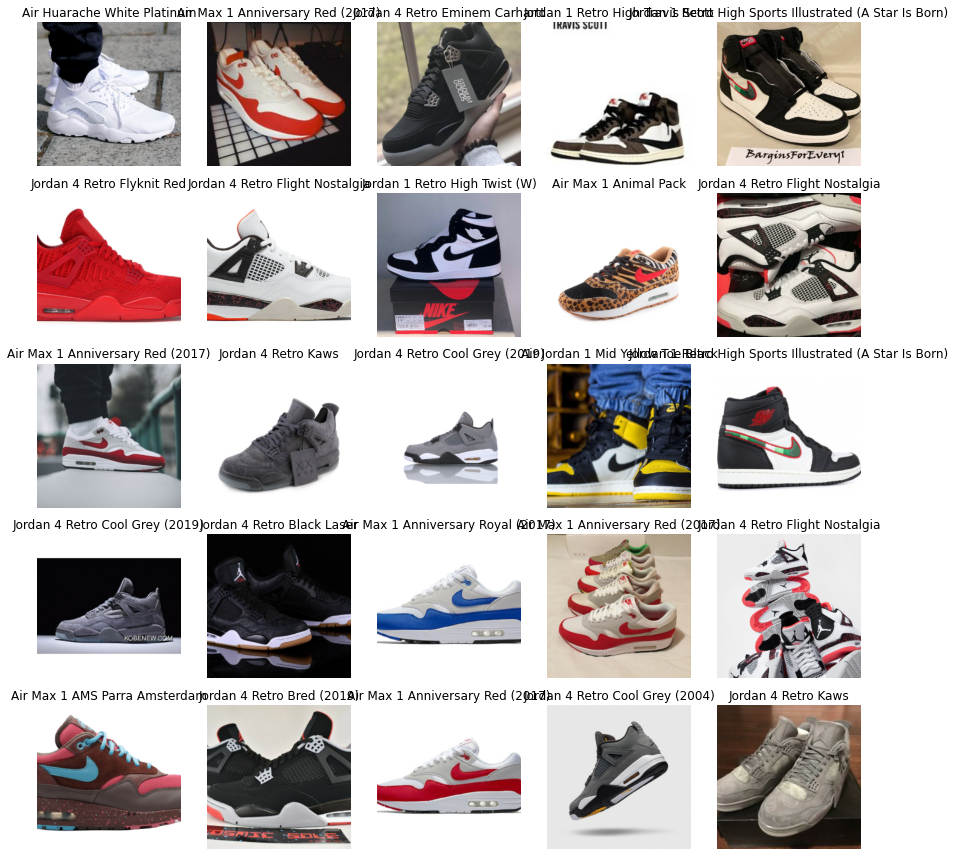

In [13]:
# 이미지로도 잘 보여준다. 
# 빨강 에러가 안뜨는 모듈을 넣어놔서 다시 실행시키면 안 뜰 것(그런데 오래 걸려서 실행 시키지는 않는다.)
data.show_batch(rows= 5, figsize = (12, 12))

In [5]:
# 전체 데이터와 트레인, 테스트 셋의 사진 개수 확인
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Air Force 1 Type',
  'Air Force 1 Type Black',
  'Air Huarache Black Black White',
  'Air Huarache Drift South Beach',
  'Air Huarache White Platinum',
  'Air Jordan 1 Mid Yellow Toe Black',
  'Air Max 1 112 Pack',
  'Air Max 1 AMS Parra Amsterdam',
  'Air Max 1 Animal Pack',
  'Air Max 1 Anniversary Obsidian',
  'Air Max 1 Anniversary Red (2017)',
  'Air Max 1 Anniversary Royal (2017)',
  'Jordan 1 Retro High Spider-Man Origin Story',
  'Jordan 1 Retro High Sports Illustrated (A Star Is Born)',
  'Jordan 1 Retro High Track Red',
  'Jordan 1 Retro High Travis Scott',
  'Jordan 1 Retro High Turbo Green',
  'Jordan 1 Retro High Twist (W)',
  'Jordan 4 Retro Black Laser',
  'Jordan 4 Retro Bred (2019)',
  'Jordan 4 Retro Columbia (2015)',
  'Jordan 4 Retro Cool Grey (2004)',
  'Jordan 4 Retro Cool Grey (2019)',
  'Jordan 4 Retro Doernbecher',
  'Jordan 4 Retro Eminem Carhartt',
  'Jordan 4 Retro Flight Nostalgia',
  'Jordan 4 Retro Flyknit Red',
  'Jordan 4 Retro Hot Punch (W)',
  'Jor

# Train Model - ResNet 34

In [10]:
# create_cnn이 cnn_learner로 이름 바뀜
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [13]:
# 모델을 학습 시키는 함수. 뒤에 숫자만큼 모델이 학습을 반복한다. 
# 우리는 resnet34 모델을 불러온 뒤 이들이 학습한 fc layer 부분만 바꾸고 학습을 진행한다. (resnet34에서 학습 후 이미지에서 좋다고 생각하는 부분만 가지고 분석하겠다는 이야기)
# 이러한 학습을 transfer learning이라고 한다. 
# 만약 모든 layer를 학습시키고 싶다면 learn.unfreeze()를 이용하면 된다. 

learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.676160,1.004580,0.297297,12:23
1,2.023549,0.627152,0.186732,12:11
2,1.271724,0.524645,0.152334,12:32
3,0.886495,0.508838,0.147420,11:10


In [14]:
# 한 번 돌리면시간이 오래 걸리니까 모델을 저장해두자. 
learn.save('stage-1')

In [11]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Jordan 4 Retro Hot Punch (W),Jordan 4 Retro Hot Punch (W),Jordan 4 Retro Hot Punch (W),Jordan 4 Retro Hot Punch (W),Jordan 4 Retro Hot Punch (W)
Path: /Users/choikyoungwan/eclipse-workspace/AI_Biz_Strategy/FinalProject/archive/sneaker_dataset/images;

Valid: LabelList (407 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Jordan 4 Retro Black Laser,Air Huarache White Platinum,Air Max 1 Anniversary Red (2017),Jordan 1 Retro High Turbo Green,Air Max 1 Animal Pack
Path: /Users/choikyoungwan/eclipse-workspace/AI_Biz_Strategy/FinalProject/archive/sneaker_dataset/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNor

# Evaluation - Resnet 34

이제 모델을 간단하게 평가해보자.
- Confusion matrix
- learning rate 등 확인
- 가장 손실이 큰 이미지 확인

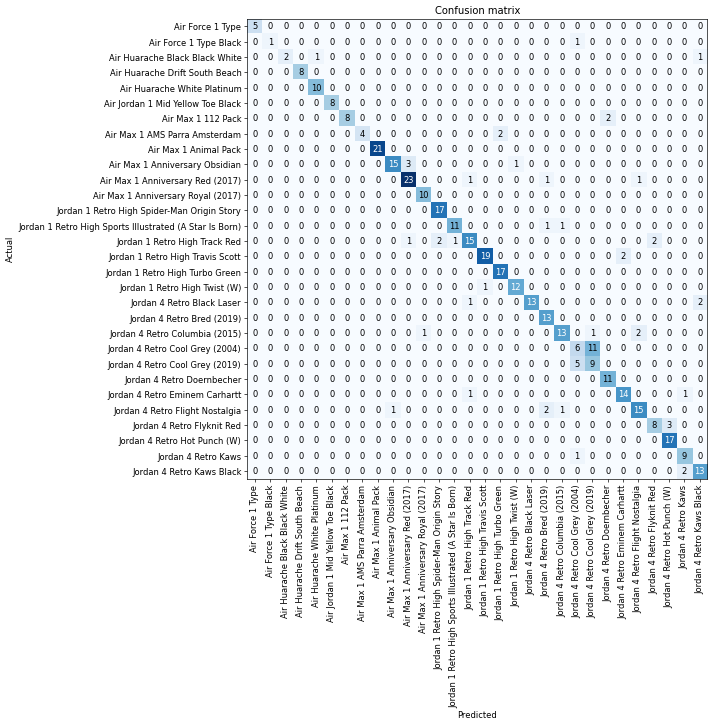

In [12]:
# confusion matrix 생성
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


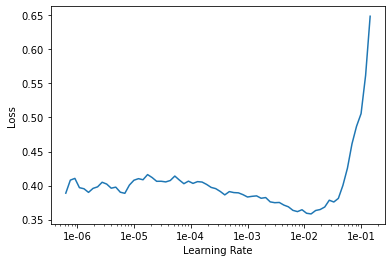

In [14]:
learn.recorder.plot()

# 일반적으로 LR&Ross 그래프는 우상향한다. LR이 높아질수록 Loss가 커진다. 
# 어쨌든 적절한 learning rate을 찾기 위해 시각적으로 그래프를 활용하는 것이니까
# 추천을 받을 수도 있다.
# learn.lr_find() 
# learn.recorder.plot(suggestion=True)

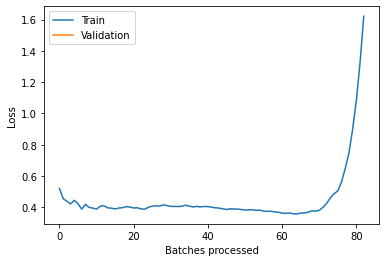

In [15]:
learn.recorder.plot_losses()

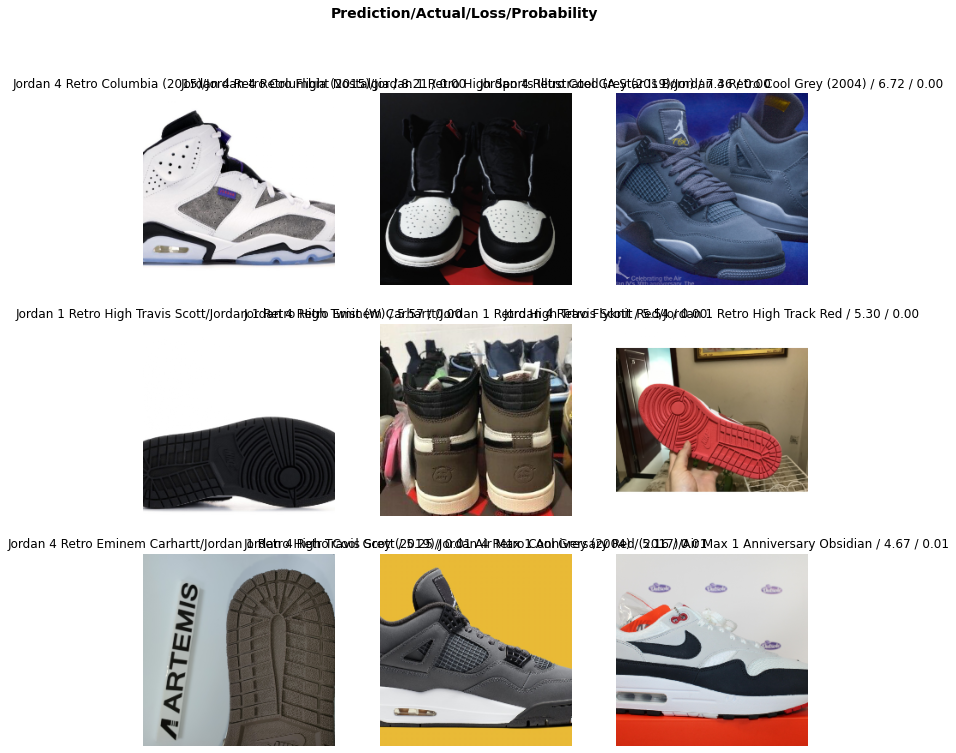

In [16]:
# Most confused case 출력
# 신발 밑바닥이나 뒷면 사진, 그리고 신발 전체가 촬영되지 않은 사진들이다. -> 분류하기 어려운 이유가 있다. 
interp.plot_top_losses(k=9)

# Train Model - ResNet 50


In [20]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(do_flip = False), size=224, bs=64, num_workers=4).normalize(imagenet_stats)


In [22]:
data.classes

['Air Force 1 Type',
 'Air Force 1 Type Black',
 'Air Huarache Black Black White',
 'Air Huarache Drift South Beach',
 'Air Huarache White Platinum',
 'Air Jordan 1 Mid Yellow Toe Black',
 'Air Max 1 112 Pack',
 'Air Max 1 AMS Parra Amsterdam',
 'Air Max 1 Animal Pack',
 'Air Max 1 Anniversary Obsidian',
 'Air Max 1 Anniversary Red (2017)',
 'Air Max 1 Anniversary Royal (2017)',
 'Jordan 1 Retro High Spider-Man Origin Story',
 'Jordan 1 Retro High Sports Illustrated (A Star Is Born)',
 'Jordan 1 Retro High Track Red',
 'Jordan 1 Retro High Travis Scott',
 'Jordan 1 Retro High Turbo Green',
 'Jordan 1 Retro High Twist (W)',
 'Jordan 4 Retro Black Laser',
 'Jordan 4 Retro Bred (2019)',
 'Jordan 4 Retro Columbia (2015)',
 'Jordan 4 Retro Cool Grey (2004)',
 'Jordan 4 Retro Cool Grey (2019)',
 'Jordan 4 Retro Doernbecher',
 'Jordan 4 Retro Eminem Carhartt',
 'Jordan 4 Retro Flight Nostalgia',
 'Jordan 4 Retro Flyknit Red',
 'Jordan 4 Retro Hot Punch (W)',
 'Jordan 4 Retro Kaws',
 'Jordan 4

In [28]:
learn_50 = create_cnn(data, models.resnet50, metrics = error_rate)

In [30]:
learn_50.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.615874,0.726337,0.223587,15:30
1,1.379038,0.539202,0.167076,13:04
2,0.864868,0.478503,0.137592,13:01
3,0.573260,0.464790,0.130221,15:37


In [31]:
learn_50.save('stage-1_50')

# Evalutation - ResNet 50

In [32]:
interp_50 = ClassificationInterpretation.from_learner(learn_50)

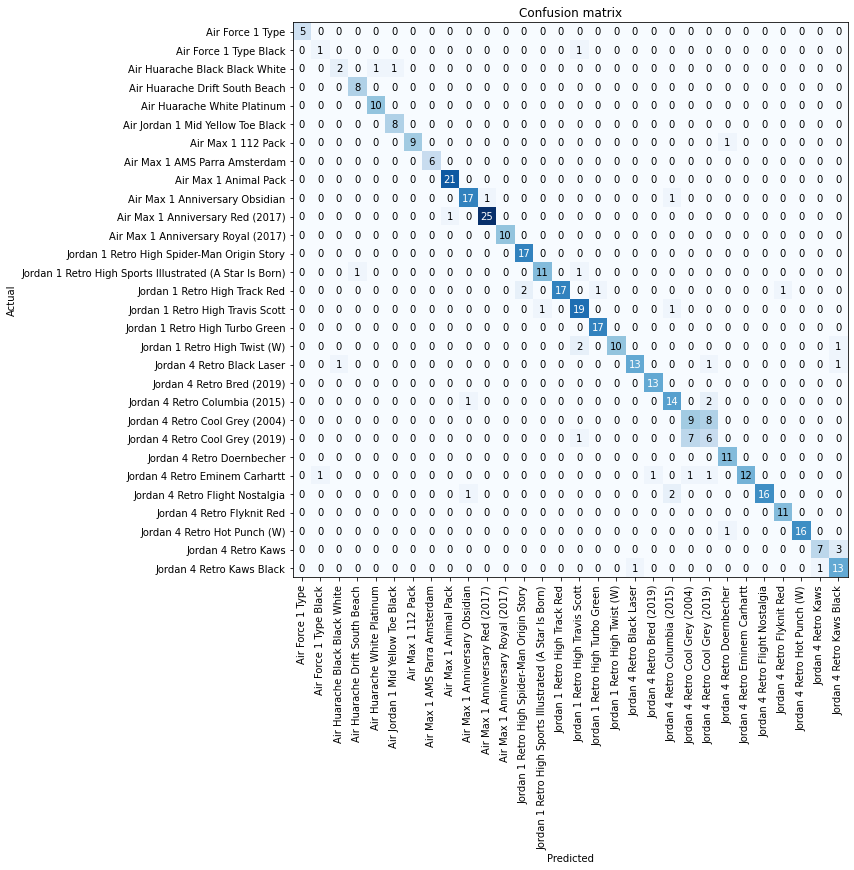

In [33]:
# confusion matrix를 그려보자. 
interp_50.plot_confusion_matrix(figsize = (12, 12))

In [34]:
learn_50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


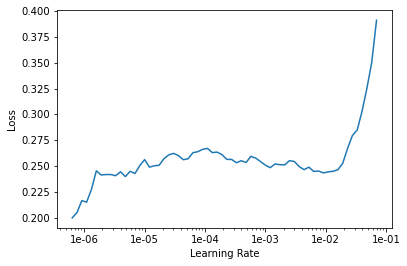

In [35]:
learn_50.recorder.plot()

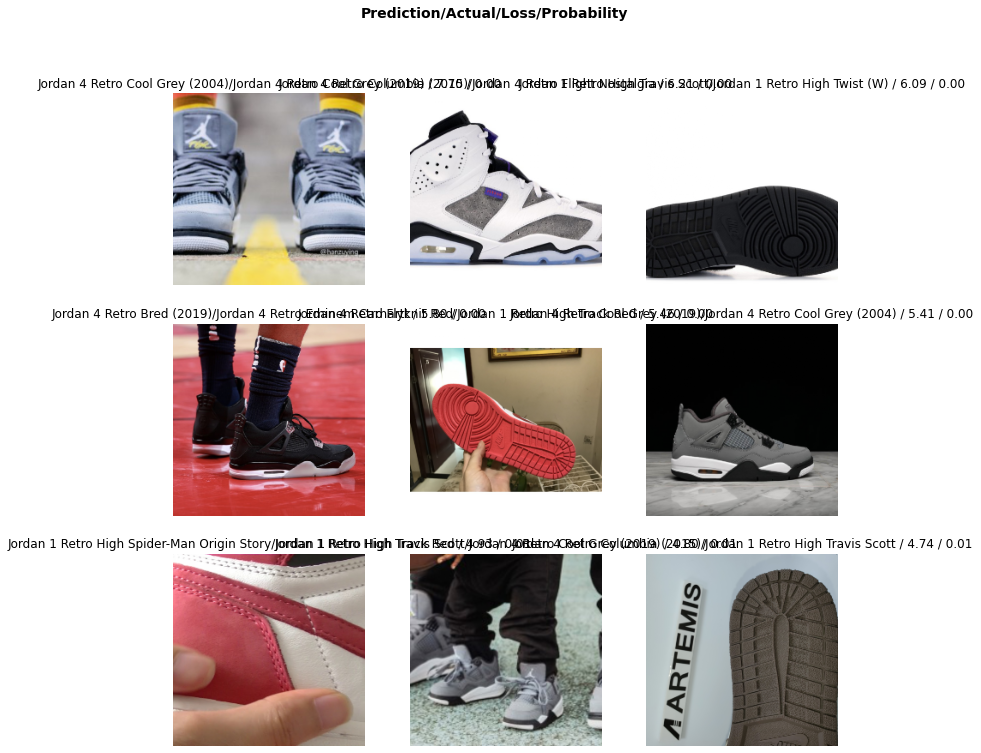

In [36]:
# 가장 헷갈리는 9개 확인
interp_50.plot_top_losses(k = 9)

# Train model - ResNet 101

In [5]:
learn_101 = create_cnn(data, models.resnet101, metrics = error_rate)

In [6]:
learn_101.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.602535,0.766106,0.245700,25:49
1,1.363367,0.554920,0.159705,26:54
2,0.829283,0.478503,0.142506,29:39
3,0.557310,0.449748,0.142506,5:29:22


In [10]:
learn_101.save('stage-1_101')

# Evalutation - ResNet 101


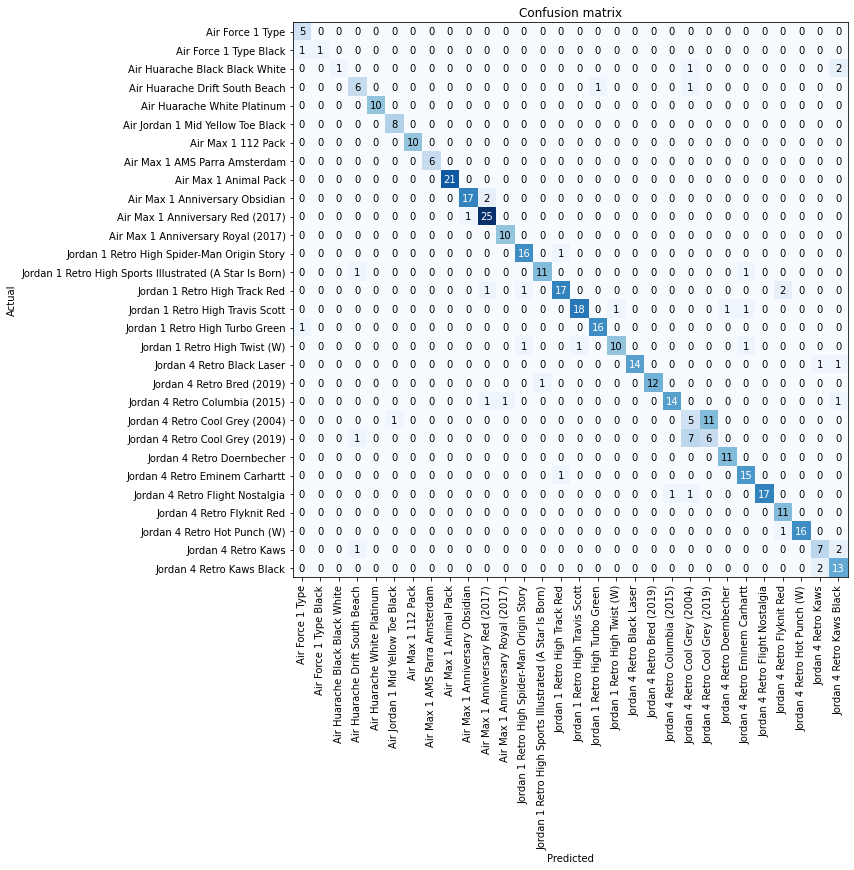

In [11]:
# Resnet 101 Results
interp_101 = ClassificationInterpretation.from_learner(learn_101)
interp_101.plot_confusion_matrix(figsize = (12, 12))

In [12]:
learn_101.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


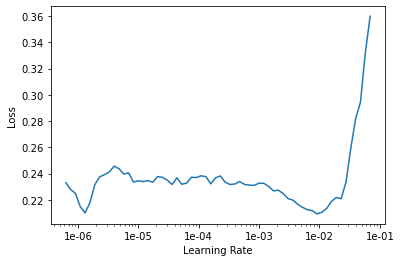

In [13]:
learn_101.recorder.plot()

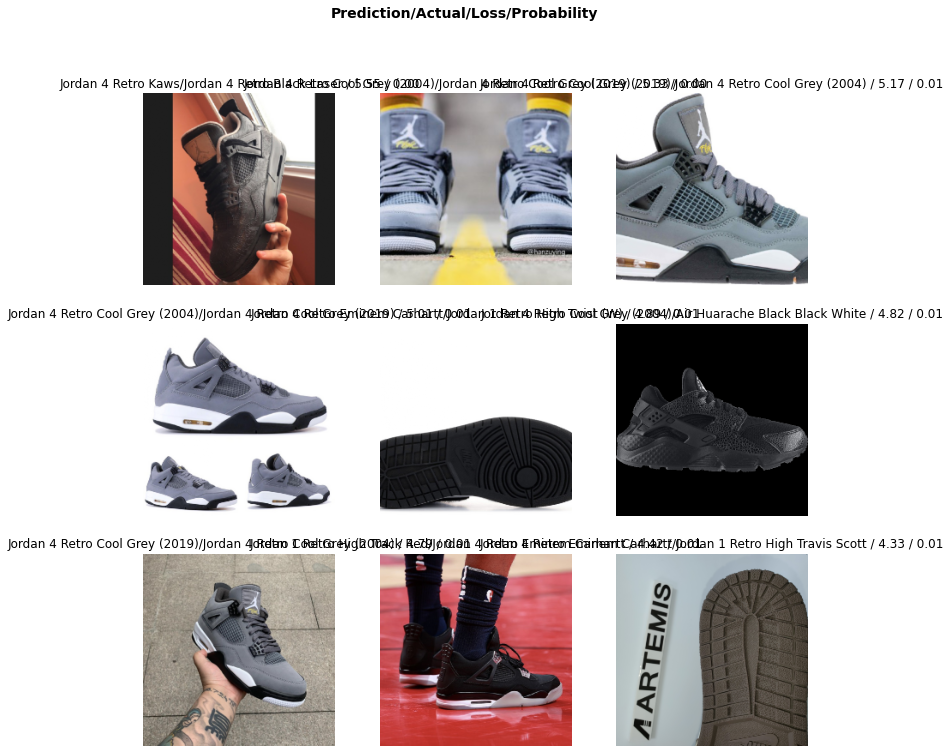

In [14]:
interp_101.plot_top_losses( k = 9 )

# Fine tuning - ResNet50

In [7]:
learn_50 = create_cnn(data, models.resnet50, metrics = error_rate)
learn_50.load('stage-1_50')

Learner(data=ImageDataBunch;

Train: LabelList (1629 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Jordan 4 Retro Hot Punch (W),Jordan 4 Retro Hot Punch (W),Jordan 4 Retro Hot Punch (W),Jordan 4 Retro Hot Punch (W),Jordan 4 Retro Hot Punch (W)
Path: /Users/choikyoungwan/eclipse-workspace/AI_Biz_Strategy/FinalProject/archive/sneaker_dataset/images;

Valid: LabelList (407 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Jordan 4 Retro Black Laser,Air Huarache White Platinum,Air Max 1 Anniversary Red (2017),Jordan 1 Retro High Turbo Green,Air Max 1 Animal Pack
Path: /Users/choikyoungwan/eclipse-workspace/AI_Biz_Strategy/FinalProject/archive/sneaker_dataset/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNor

In [ ]:
## fine_tune base_lr을 적용
# https://walkwithfastai.com/lr_finder
# learn_50.fine_tune(1, base_lr = 1e-2)

# 위의 fine_tune이 제 fastai 버전에선 계속 없다고 나와서 이 방식으로 학습을 다시 했습니다. 
# https://forums.fast.ai/t/fine-tune-vs-fit-one-cycle/66029/7
# 새 모델을 만들 때 fit_one_cycle을 하는 거고 모델을 정교화할 때 fine_tune을 쓰는 데 어쨌든 같은 결과를 얻는 다는 내용이 있길래.. 
learn_50.fit_one_cycle(1, 1e-2)

# 처음 돌렸을 때보다 epoch 0 일 때 train_loss, valid_loss, error_rate는 모두 줄어들었다.
# 하지만 epoch 3이랑 비교하면 error_rate 더 높은게 함정..

In [28]:
learn_50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [29]:
learn_50.save('stage-2_50')

# Testing Model

In [ ]:
# Air max anniversary red(2017) 모델 이미지를 임의로 구글에서 하나 검색해 다운로드 받고 테스트해보겠습니다!
setwd()

In [30]:
wd = "/Users/choikyoungwan/eclipse-workspace/AI_Biz_Strategy/FinalProject/archive/sneaker_dataset/images/"
path = Path(wd)

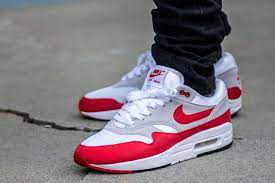

In [31]:
img = open_image(path/'train'/'test_AirMax1.jpeg')
img

In [33]:
final_learn = create_cnn(data, models.resnet50, metrics = error_rate)
final_learn.load('stage-2_50')

pred_class,pred_idx,outputs = final_learn.predict(img)
pred_class

Category tensor(10)

In [34]:
outputs

tensor([6.5340e-06, 2.9175e-06, 7.7849e-06, 7.1498e-07, 1.6198e-03, 6.8376e-06,
        4.6487e-07, 4.9877e-05, 9.2879e-04, 1.6318e-03, 9.9429e-01, 1.7904e-04,
        1.2223e-03, 9.6530e-06, 6.6885e-06, 2.0563e-06, 4.7019e-07, 1.0997e-06,
        1.8935e-06, 5.0271e-07, 7.0957e-07, 1.0294e-06, 8.4987e-09, 9.0166e-07,
        5.8172e-08, 2.7005e-06, 8.0234e-06, 1.1537e-05, 2.2852e-08, 7.1786e-06])

In [36]:
pred = final_learn.predict(img)

In [37]:
pred

(Category tensor(10),
 tensor(10),
 tensor([6.5340e-06, 2.9175e-06, 7.7849e-06, 7.1498e-07, 1.6198e-03, 6.8376e-06,
         4.6487e-07, 4.9877e-05, 9.2879e-04, 1.6318e-03, 9.9429e-01, 1.7904e-04,
         1.2223e-03, 9.6530e-06, 6.6885e-06, 2.0563e-06, 4.7019e-07, 1.0997e-06,
         1.8935e-06, 5.0271e-07, 7.0957e-07, 1.0294e-06, 8.4987e-09, 9.0166e-07,
         5.8172e-08, 2.7005e-06, 8.0234e-06, 1.1537e-05, 2.2852e-08, 7.1786e-06]))

In [39]:
final_learn.data.classes

['Air Force 1 Type',
 'Air Force 1 Type Black',
 'Air Huarache Black Black White',
 'Air Huarache Drift South Beach',
 'Air Huarache White Platinum',
 'Air Jordan 1 Mid Yellow Toe Black',
 'Air Max 1 112 Pack',
 'Air Max 1 AMS Parra Amsterdam',
 'Air Max 1 Animal Pack',
 'Air Max 1 Anniversary Obsidian',
 'Air Max 1 Anniversary Red (2017)',
 'Air Max 1 Anniversary Royal (2017)',
 'Jordan 1 Retro High Spider-Man Origin Story',
 'Jordan 1 Retro High Sports Illustrated (A Star Is Born)',
 'Jordan 1 Retro High Track Red',
 'Jordan 1 Retro High Travis Scott',
 'Jordan 1 Retro High Turbo Green',
 'Jordan 1 Retro High Twist (W)',
 'Jordan 4 Retro Black Laser',
 'Jordan 4 Retro Bred (2019)',
 'Jordan 4 Retro Columbia (2015)',
 'Jordan 4 Retro Cool Grey (2004)',
 'Jordan 4 Retro Cool Grey (2019)',
 'Jordan 4 Retro Doernbecher',
 'Jordan 4 Retro Eminem Carhartt',
 'Jordan 4 Retro Flight Nostalgia',
 'Jordan 4 Retro Flyknit Red',
 'Jordan 4 Retro Hot Punch (W)',
 'Jordan 4 Retro Kaws',
 'Jordan 4

In [40]:
pred_result = pred[2].sort(descending = True)
pred_result

torch.return_types.sort(
values=tensor([9.9429e-01, 1.6318e-03, 1.6198e-03, 1.2223e-03, 9.2879e-04, 1.7904e-04,
        4.9877e-05, 1.1537e-05, 9.6530e-06, 8.0234e-06, 7.7849e-06, 7.1786e-06,
        6.8376e-06, 6.6885e-06, 6.5340e-06, 2.9175e-06, 2.7005e-06, 2.0563e-06,
        1.8935e-06, 1.0997e-06, 1.0294e-06, 9.0166e-07, 7.1498e-07, 7.0957e-07,
        5.0271e-07, 4.7019e-07, 4.6487e-07, 5.8172e-08, 2.2852e-08, 8.4987e-09]),
indices=tensor([10,  9,  4, 12,  8, 11,  7, 27, 13, 26,  2, 29,  5, 14,  0,  1, 25, 15,
        18, 17, 21, 23,  3, 20, 19, 16,  6, 24, 28, 22]))

In [42]:
top_3_pred_probs = pred_result[0][:3]
# convert probs to numpy array because I just want the numbers by themselves without 'tensor'
top_3_pred_probs = top_3_pred_probs.numpy()

top_3_pred_class_idxs = pred_result[1][:3]

# Convert label from 'air_jordan_3' to 'Air Jordan 3' after looking up proper index
top_3_pred_classes = [final_learn.data.classes[i].replace('_', ' ').title() for i in top_3_pred_class_idxs]

print(top_3_pred_probs)
print(top_3_pred_classes)

pred_top_3_output = list(zip(top_3_pred_classes, top_3_pred_probs))
print(pred_top_3_output)

### 제대로 예측을 하네요오!

[0.994289 0.001632 0.00162 ]
['Air Max 1 Anniversary Red (2017)', 'Air Max 1 Anniversary Obsidian', 'Air Huarache White Platinum']
[('Air Max 1 Anniversary Red (2017)', 0.9942887), ('Air Max 1 Anniversary Obsidian', 0.0016318068), ('Air Huarache White Platinum', 0.0016197938)]


<Figure size 576x576 with 0 Axes>

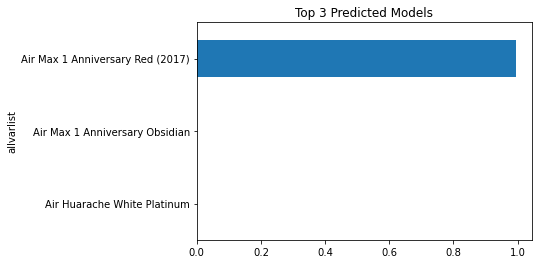

In [43]:
plt.figure(figsize=(8,8))
df=pd.DataFrame({'allvarlist':top_3_pred_classes,'importances': top_3_pred_probs})
df.sort_values('importances',inplace=True)
df.plot(kind='barh',y='importances',x='allvarlist', legend=False, title='Top 3 Predicted Models');